In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mesa_reader as m

# Lab 3 -- analyzing MESA output for the evolution of a Sun-like star

### Names of all group members: Josephine Bronzy...

### 1. Load the time series data into an object d and list all the possible variables

"star_age" is time

"center_" means calculated for the core

"log_average_" means it is the logarithm of the value averaged over the star

"surf_" means evaluated at the surface

In [19]:
# set the path variable to the directory containing the data files
# you can leave this as an empty string if the files are in the same directory as the Jupyter notebook
path = ''
d = m.MesaData(file_name=path+'history.data')
ms = m.MesaData(file_name=path+'profile4.data')
rg = m.MesaData(file_name=path+'profile25.data')
d.read_data()
d.bulk_names


('model_number',
 'star_age',
 'star_mass',
 'log_abs_mdot',
 'log_dt',
 'num_zones',
 'log_total_angular_momentum',
 'log_rotational_mdot_boost',
 'log_max_residual',
 'log_residual_norm',
 'num_newton_iterations',
 'rel_E_err',
 'log_rel_E_err',
 'log_rel_run_E_err',
 'virial_thm_P_avg',
 'virial_thm_rel_err',
 'conv_mx1_top',
 'conv_mx1_bot',
 'conv_mx2_top',
 'conv_mx2_bot',
 'mx1_top',
 'mx1_bot',
 'mx2_top',
 'mx2_bot',
 'epsnuc_M_1',
 'epsnuc_M_2',
 'epsnuc_M_3',
 'epsnuc_M_4',
 'epsnuc_M_5',
 'epsnuc_M_6',
 'epsnuc_M_7',
 'epsnuc_M_8',
 'he_core_mass',
 'c_core_mass',
 'o_core_mass',
 'si_core_mass',
 'fe_core_mass',
 'kh_timescale',
 'log_LH',
 'log_LHe',
 'log_L',
 'log_Teff',
 'log_R',
 'log_g',
 'surf_avg_j_rot',
 'surf_avg_omega',
 'surf_avg_omega_crit',
 'surf_avg_omega_div_omega_crit',
 'surf_avg_v_rot',
 'surf_avg_v_crit',
 'surf_avg_v_div_v_crit',
 'surf_avg_Lrad_div_Ledd',
 'log_center_T',
 'log_center_Rho',
 'log_center_P',
 'center_omega',
 'center_omega_div_omega_c

### 2. identify the main sequence phase of the star
hint: where does H burning in the core start? where does the star leave the "main sequence" strip of the H-R diagram?

you can also "Zoom in" by changing the start and end points of the x-axis tstart and tstop: plt.xlim(tstart,tstop) 

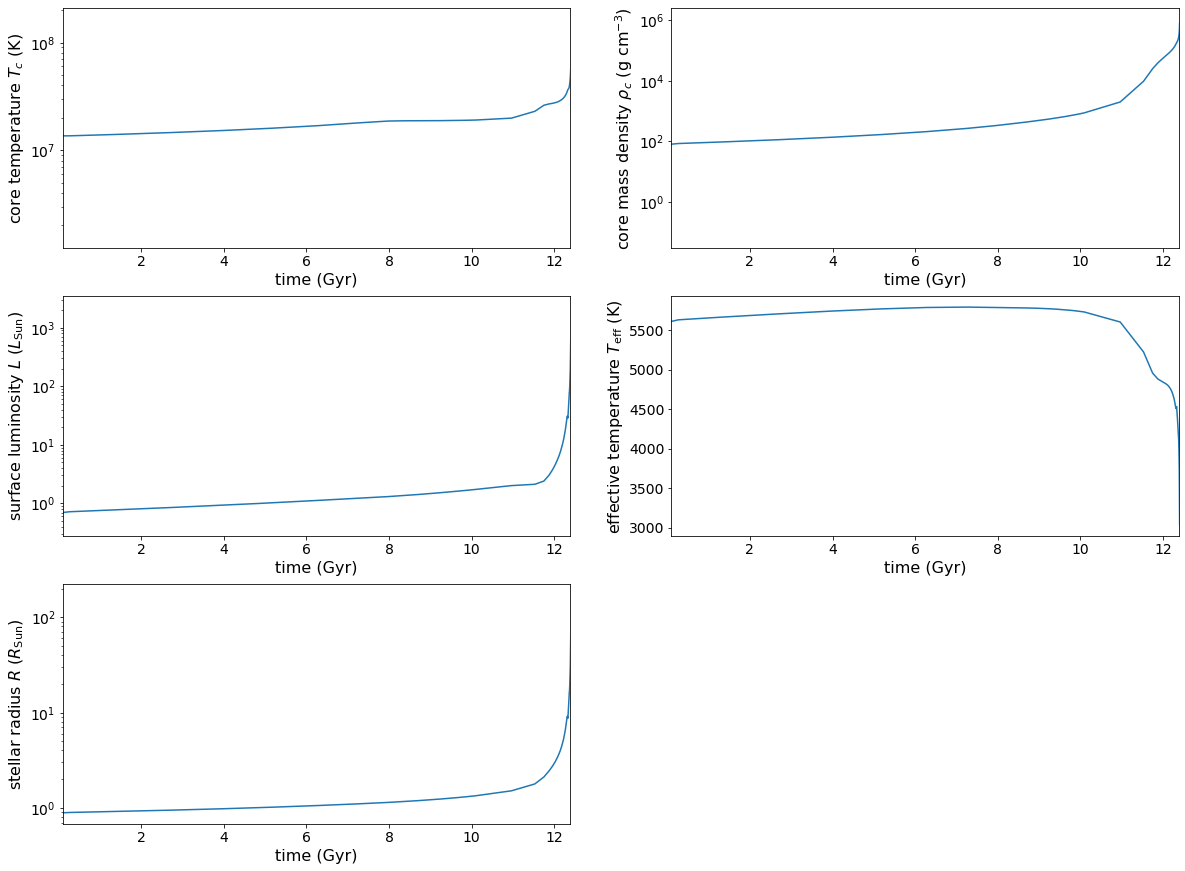

In [41]:
# change these values if you want to Zoom in to a certain time range
tstart= .1; tstop= 12.38



fig, axArr = plt.subplots(3,2,figsize=(20,15))
#plt.figure(figsize=(5,4))
axArr[0,0].semilogy(d.data('star_age')/1e9,10**d.data('log_center_T'))
axArr[0,0].xaxis.set_tick_params(labelsize=14)
axArr[0,0].yaxis.set_tick_params(labelsize=14)
axArr[0,0].set_xlabel('time (Gyr)',fontsize=16); axArr[0,0].set_ylabel(r'core temperature $T_c$ (K)',fontsize=16)
axArr[0,0].set_xlim(tstart,tstop)



#plt.figure(figsize=(5,4))
axArr[0,1].semilogy(d.data('star_age')/1e9,10**d.data('log_center_Rho'))
axArr[0,1].xaxis.set_tick_params(labelsize=14)
axArr[0,1].yaxis.set_tick_params(labelsize=14)
axArr[0,1].set_xlabel('time (Gyr)',fontsize=16); axArr[0,1].set_ylabel(r'core mass density $\rho_c$ (g cm$^{-3}$)',fontsize=16)
axArr[0,1].set_xlim(tstart,tstop)

#plt.figure(figsize=(5,4))
axArr[1,0].semilogy(d.data('star_age')/1e9,10**d.data('log_L'))
axArr[1,0].xaxis.set_tick_params(labelsize=14)
axArr[1,0].yaxis.set_tick_params(labelsize=14)
axArr[1,0].set_xlabel('time (Gyr)',fontsize=16); axArr[1,0].set_ylabel(r'surface luminosity $L$ ($L_{\rm Sun}$)',fontsize=16)
axArr[1,0].set_xlim(tstart,tstop)

#plt.figure(figsize=(5,4))
axArr[1,1].plot(d.data('star_age')/1e9,10**d.data('log_Teff'))
#ax = plt.gca()
axArr[1,1].xaxis.set_tick_params(labelsize=14)
axArr[1,1].yaxis.set_tick_params(labelsize=14)
axArr[1,1].set_xlabel('time (Gyr)',fontsize=16); axArr[1,1].set_ylabel(r'effective temperature $T_{\rm eff}$ (K)',fontsize=16)
axArr[1,1].set_xlim(tstart,tstop)

#plt.figure(figsize=(5,4))
axArr[2,0].semilogy(d.data('star_age')/1e9,10**d.data('log_R'))
#ax = plt.gca()
axArr[2,0].xaxis.set_tick_params(labelsize=14)
axArr[2,0].yaxis.set_tick_params(labelsize=14)
axArr[2,0].set_xlabel('time (Gyr)',fontsize=16); axArr[2,0].set_ylabel(r'stellar radius $R$ ($R_{\rm Sun}$)',fontsize=16)
axArr[2,0].set_xlim(tstart,tstop)

fig.delaxes(axArr[2,1])

a) where in radius do you think is the outer boundary of the "core" of the star and why? 

On the Stellar Radius vs Time graph we can see that the stellar radius is similar to that of a 1 solar radius star for most of its life which would corrospond to a star similar to our own. Our suns core is 1/4 of the radius out, or 3/4 of the radius inward. This makes the cores outter boundary either 1/4 out from the center of the radius or 3/4 of the radius inward as well.

b) how much of the enclosed mass is in the core?

The total mass increases with radius and we determined that the core radius is a quarter (0.25%) the total star radius. From observing other stellar structures / core mass density graph that the core is very dense and would have more mass than a linear relationship with radius. This means the core would have 30-35% of the stars enclosed mass. 
    
c) are the conditions what you expect for a main sequence star in terms of core temperature and energy generation?
 
Yes, the conditions replicate a star that is very close in properties to our own. It lives for roughly 10-11 billion years which is comparable to our sun, it is about the size of our sun given its 1 solar radius size, and its core temperature rises to about 10 million kelvin which is similar to our own. All of these properties suggest that it is similar to our sun which is also on the main sequence and all properties support this.

d) how does the density profile compare to what we assumed in HW3 problem 1?
 
The graphs do agree with eachother, on the homework it is saying as the stars radius increases the density goes down which goes hand in hand with our graph which shows as the star leaves the main sequence, the core collapsees and gets smaller which means the stars density increases in the core. 


(-0.05, 1.05)

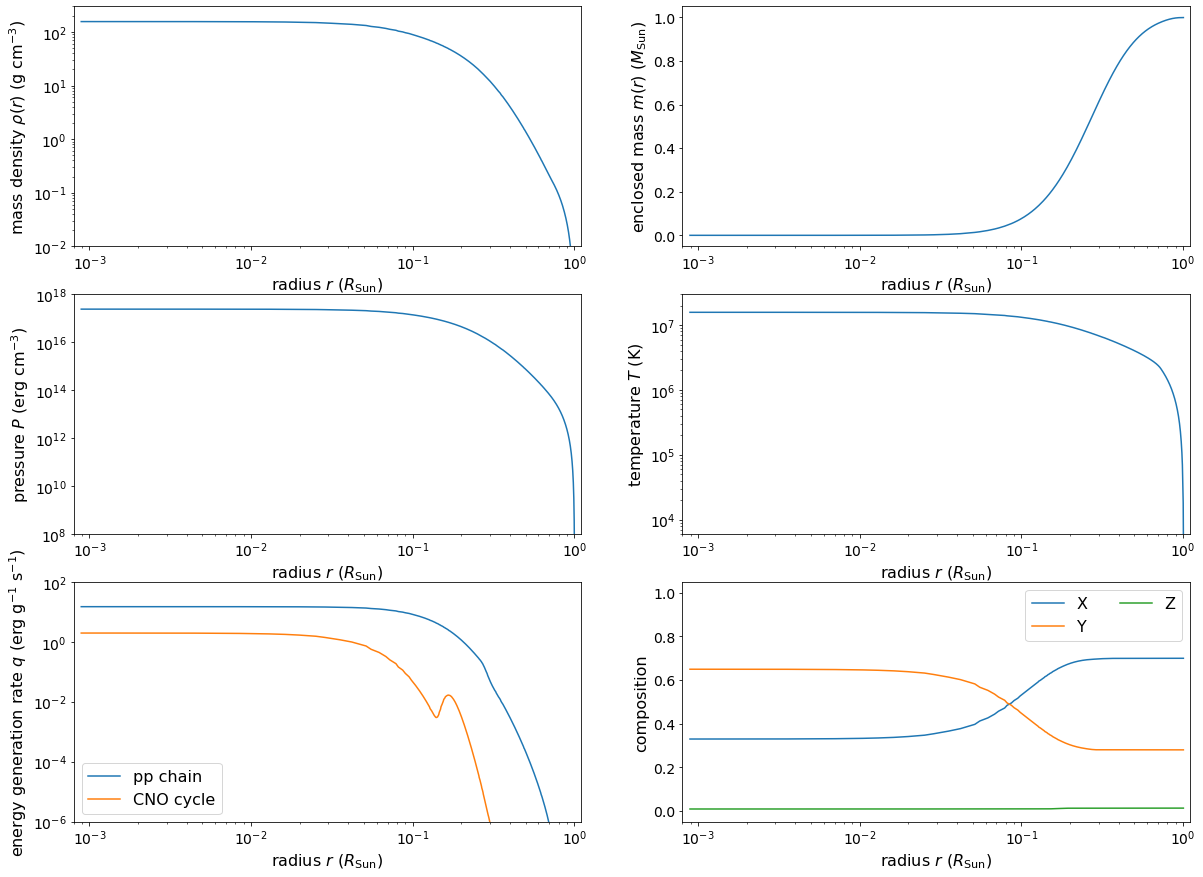

In [43]:
rstart=8e-4; rstop=1.1

fig, axArr = plt.subplots(3,2,figsize=(20,15))

axArr[0,0].loglog(ms.data('r_equatorial'),10**ms.data('logRho'))
axArr[0,0].xaxis.set_tick_params(labelsize=14)
axArr[0,0].yaxis.set_tick_params(labelsize=14)
axArr[0,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[0,0].set_ylabel(r'mass density $\rho(r)$ (g cm$^{-3}$)',fontsize=16)
axArr[0,0].set_xlim(rstart,rstop)
axArr[0,0].set_ylim(1e-2,3e2)

axArr[0,1].semilogx(ms.data('r_equatorial'),ms.data('mass'))
axArr[0,1].xaxis.set_tick_params(labelsize=14)
axArr[0,1].yaxis.set_tick_params(labelsize=14)
axArr[0,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[0,1].set_ylabel(r'enclosed mass $m(r)$ ($M_{\rm Sun}$)',fontsize=16)
axArr[0,1].set_xlim(rstart,rstop)
axArr[0,1].set_ylim(-0.05,1.05)

axArr[1,0].loglog(ms.data('r_equatorial'),ms.data('pressure'))
axArr[1,0].xaxis.set_tick_params(labelsize=14)
axArr[1,0].yaxis.set_tick_params(labelsize=14)
axArr[1,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[1,0].set_ylabel(r'pressure $P$ (erg cm$^{-3}$)',fontsize=16)
axArr[1,0].set_xlim(rstart,rstop)
axArr[1,0].set_ylim(1e8,1e18)

axArr[1,1].loglog(ms.data('r_equatorial'),10**ms.data('logT'))
axArr[1,1].xaxis.set_tick_params(labelsize=14)
axArr[1,1].yaxis.set_tick_params(labelsize=14)
axArr[1,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[1,1].set_ylabel(r'temperature $T$ (K)',fontsize=16)
axArr[1,1].set_xlim(rstart,rstop)
axArr[1,1].set_ylim(6e3,3e7)

axArr[2,0].loglog(ms.data('r_equatorial'),ms.data('pp'),label='pp chain')
axArr[2,0].loglog(ms.data('r_equatorial'),ms.data('cno'),label='CNO cycle')
axArr[2,0].xaxis.set_tick_params(labelsize=14)
axArr[2,0].yaxis.set_tick_params(labelsize=14)
axArr[2,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[2,0].set_ylabel(r'energy generation rate $q$ (erg g$^{-1}$ s$^{-1}$)',fontsize=16)
axArr[2,0].set_xlim(rstart,rstop)
axArr[2,0].set_ylim(1e-6,1e2)
axArr[2,0].legend(fontsize=16)

axArr[2,1].semilogx(ms.data('r_equatorial'),ms.data('h1'),label='X')
axArr[2,1].semilogx(ms.data('r_equatorial'),ms.data('he4'),label='Y')
axArr[2,1].semilogx(ms.data('r_equatorial'),ms.data('c12')+ms.data('o16'),label='Z')
axArr[2,1].xaxis.set_tick_params(labelsize=14)
axArr[2,1].yaxis.set_tick_params(labelsize=14)
axArr[2,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[2,1].set_ylabel(r'composition',fontsize=16)
axArr[2,1].set_xlim(rstart,rstop)
axArr[2,1].legend(fontsize=16,ncol=2)
axArr[2,1].set_ylim(-0.05,1.05)

### 4. what happens just after the star leaves the main sequence?
for this part refer to the plots from Q2 as well as the new ones below showing the changes in composition over time

the main sequence is the phase where the star is burning hydrogen in the core. 

a) is most of the hydrogen in the star converted to helium during this phase?

Yes, part of the transition out of the main sequence is when a star uses up its hydrogen supply and then switches to burning helium. The star continues onto heavier elements after the helium is used up, and so forth. In the graph composition vs radius we see the relationship that as radius increases Z (heavier elements) does not change, Y (He) is more abundant at small radii while decreasing at larger radii, and X (H) is less abundant at smaller radii and more abundant at larger radii. This happens because there is a lower amount of H and He in the core which makes sense given that H burning stops in this phase leaving the main sequence.

b) just afterwards, is the core hot enough to burn He? what nuclear fuel is being consumed?

 Yes, the core is hot enough after it runs out of H to start burning He. It reaches around 100 mil degrees to do so from previously being  alittle over 10mil. At this point He is being fused into Carbon in the core.

c) given the star's location on the HR diagram (and/or its radius), what phase do you think this might be?

 The radius is relativley small about 10^-3 and increases to 10^0 which is 1 solar mass. This means the graph shoes radii from smaller than a solar mass to larger than a solar mass. In quadrant 2 we can see that the radius contracts after leaving the main sequence as it enters the red giant phase. 

(0.1, 12.38)

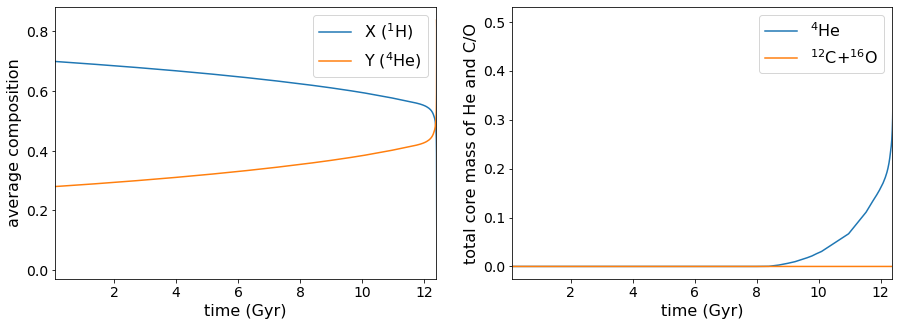

In [44]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(d.data('star_age')/1e9,10**d.data('log_average_h1'),label=r'X ($^1$H)')
ax1.plot(d.data('star_age')/1e9,10**d.data('log_average_he4'),label=r'Y ($^4$He)')
ax1.legend(fontsize=16)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xlabel('time (Gyr)',fontsize=16); ax1.set_ylabel(r'average composition',fontsize=16)
ax1.set_xlim(tstart,tstop)

ax2.plot(d.data('star_age')/1e9,d.data('he_core_mass'),label='$^4$He')
ax2.plot(d.data('star_age')/1e9,d.data('c_core_mass'),label='$^{12}$C$+^{16}$O')
ax2.legend(fontsize=16)
ax2.xaxis.set_tick_params(labelsize=14)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xlabel('time (Gyr)',fontsize=16); ax2.set_ylabel(r'total core mass of He and C/O',fontsize=16)
ax2.set_xlim(tstart,tstop)

### 5. radial structure after leaving the main sequence

a) how does the radial structure of the star compare to when it was on the main sequence, e.g. in terms of the central  and surface density and total radius and mass? make sure to check the numerical values of the graphs as well as their shapes!

After the star leaves the main sequence the radius gets much larger which we can see at the last data point on the graph. It started at a little under 10^0 R_run while it was on the main sequence for most of its life and then transitioned to around 10^1.7 R_sun as it leaves the main sequence and becomes a red giant. The core mass density of the star increased as well during this time of leaving the main sequence which started around 10^2 g/cm^3 while on main sequence and increased rapidly to 10^6 g/cm^3 (rapid compared to the very slow increase over its time on the main sequence) as it left the main sequence. Lastly, the luminosity increased from 10^0 L_sun to a little under 10^3 L_sun after leaving main sequence.

b) how has the composition of the core of the star changed? where is nuclear fusion occuring in the star during this phase? what is the main nuclear reaction chain taking place? is the peak energy generation rate smaller or larger than it was on the main sequence?

 The composition mainly changed from H burning to He burning which takes place in the core. Hydrogen does still burn in a shell around the core after the core is mainly burning He supply. This reaction converts He to Carbon. The star is composed of a maximum of 0.7 of H in the composition vs radius graph which occurs in the outer layers of the star while the minimum is 0 in the core. For helium the maximum is 1 in the core and 0.3 in outter layers of the star. The peak generation rate is about 10^7 erg/g*s after leaving main sequence. When the star was still on the main sequence though the peak generation rate was about 10^0 to 10^1 erg/g*s. Here we can see that the peak generation rate is much higher after leaving the main sequence. 

(-0.05, 1.05)

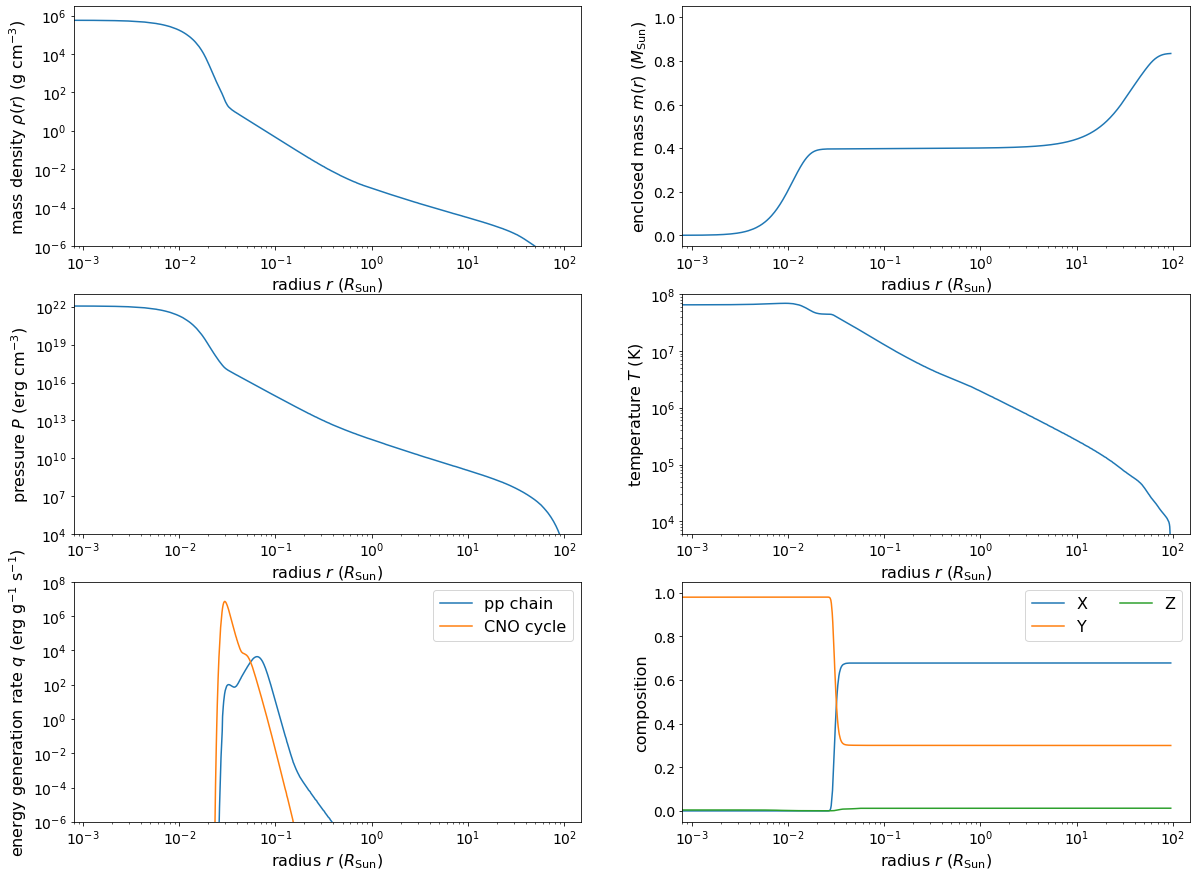

In [45]:
rstart=8e-4; rstop=1.5e2

fig, axArr = plt.subplots(3,2,figsize=(20,15))
axArr[0,0].loglog(rg.data('r_equatorial'),10**rg.data('logRho'))
axArr[0,0].xaxis.set_tick_params(labelsize=14)
axArr[0,0].yaxis.set_tick_params(labelsize=14)
axArr[0,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[0,0].set_ylabel(r'mass density $\rho(r)$ (g cm$^{-3}$)',fontsize=16)
axArr[0,0].set_xlim(rstart,rstop)
axArr[0,0].set_ylim(1e-6,3e6)

axArr[0,1].semilogx(rg.data('r_equatorial'),rg.data('mass'))
axArr[0,1].xaxis.set_tick_params(labelsize=14)
axArr[0,1].yaxis.set_tick_params(labelsize=14)
axArr[0,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[0,1].set_ylabel(r'enclosed mass $m(r)$ ($M_{\rm Sun}$)',fontsize=16)
axArr[0,1].set_xlim(rstart,rstop)
axArr[0,1].set_ylim(-0.05,1.05)

axArr[1,0].loglog(rg.data('r_equatorial'),rg.data('pressure'))
axArr[1,0].xaxis.set_tick_params(labelsize=14)
axArr[1,0].yaxis.set_tick_params(labelsize=14)
axArr[1,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[1,0].set_ylabel(r'pressure $P$ (erg cm$^{-3}$)',fontsize=16)
axArr[1,0].set_xlim(rstart,rstop)
axArr[1,0].set_ylim(1e4,1e23)

axArr[1,1].loglog(rg.data('r_equatorial'),10**rg.data('logT'))
axArr[1,1].xaxis.set_tick_params(labelsize=14)
axArr[1,1].yaxis.set_tick_params(labelsize=14)
axArr[1,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[1,1].set_ylabel(r'temperature $T$ (K)',fontsize=16)
axArr[1,1].set_xlim(rstart,rstop)
axArr[1,1].set_ylim(6e3,1e8)

axArr[2,0].loglog(rg.data('r_equatorial'),rg.data('pp'),label='pp chain')
axArr[2,0].loglog(rg.data('r_equatorial'),rg.data('cno'),label='CNO cycle')
axArr[2,0].xaxis.set_tick_params(labelsize=14)
axArr[2,0].yaxis.set_tick_params(labelsize=14)
axArr[2,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[2,0].set_ylabel(r'energy generation rate $q$ (erg g$^{-1}$ s$^{-1}$)',fontsize=16)
axArr[2,0].set_xlim(rstart,rstop)
axArr[2,0].set_ylim(1e-6,1e8)
axArr[2,0].legend(fontsize=16)

axArr[2,1].semilogx(rg.data('r_equatorial'),rg.data('h1'),label='X')
axArr[2,1].semilogx(rg.data('r_equatorial'),rg.data('he4'),label='Y')
axArr[2,1].semilogx(rg.data('r_equatorial'),rg.data('c12')+rg.data('o16'),label='Z')
axArr[2,1].xaxis.set_tick_params(labelsize=14)
axArr[2,1].yaxis.set_tick_params(labelsize=14)
axArr[2,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[2,1].set_ylabel(r'composition',fontsize=16)
axArr[2,1].set_xlim(rstart,rstop)
axArr[2,1].legend(fontsize=16,ncol=2)
axArr[2,1].set_ylim(-0.05,1.05)

 
the next phases get even more extreme. When does $^4$He start fusing in the core (the "helium flash")? Does that make sense in terms of the core temperature?

It starts fusing in the core when the gravitational pressure has increased the temperature upwards of 10^8 K as depicted above; yet, that is not the case for the core temperature because the helium flash appears to occur at 8.5Gyr when it's still at around 10 million K, so it hasn't sustained that 100mil temperature threshold yet. That occurs at around 11Gyr.

Based on the graphs in Q2, why are the phases following the main sequence so much shorter? You might reason in terms of energy balance (fuel consumption) or core temperature (luminosity)

 As discussed in class we know the star stays on the MS for roughly 90% of its life. The other 10% contains much shorter phases because there is this rapid inbalance between pressure and density and gravity (no longer in hydrostatic equilibrium), and many other factors in the star that is causing this extreme increase in both core temperature and fuel consumption. It causes the rates of which fusion occurs to increase, so that is why it's fusing each element faster, and causing it to reach its death much faster. 

Optional to find on your own using the data object d: 

--according to this calculation, what are the "final" mass and radius of the star? How can you explain that result for the mass?

--what is the core made of in the end state?

Note that the later stages starting with the "helium flash" are uncertain, and the details e.g. numbers for real stars have some uncertainty